In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
%matplotlib inline

<Axes: >

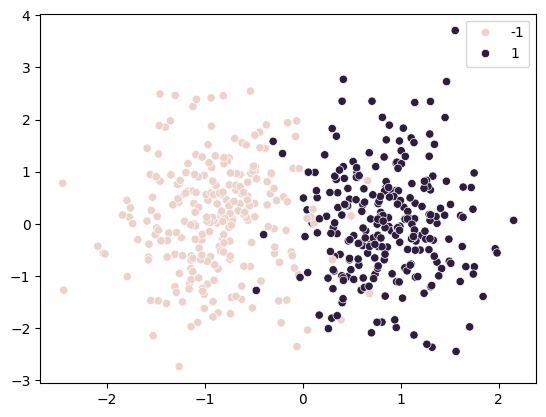

In [3]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
x = preprocessing.scale(x)

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

y=np.where(y==0,-1,1)
y_test=np.where(y_test==0,-1,1)

sns.scatterplot(x=x[:,0], y=x[:,1], hue=y.reshape(-1))

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x, y)

y_pred = model.predict(x_test)


In [5]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.97


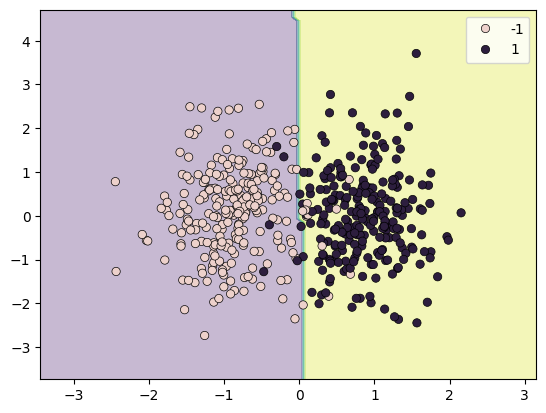

In [6]:
xx, yy = np.meshgrid(np.linspace(x[:,0].min()-1, x[:,0].max()+1, 100),
                     np.linspace(x[:,1].min()-1, x[:,1].max()+1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y.reshape(-1), edgecolor="k")
plt.show()
